In [32]:
import pandas as pd
import matplotlib.pyplot as plt

Now time to look through the data

In [19]:
df = pd.read_excel("datasets/MPS-Arrests.xlsx")

In [29]:
df.head()

,Arrest Year,Arrest Month,Arrest Month Name,Gender,Age Group,Ethnicity (4+1),First Arrest Offnece,Domestic Abuse Flag,Arrest Count
0,2019,1,January,Female,Adult,Asian,Assault,No,10
1,2019,1,January,Female,Adult,Asian,Assault,Yes,22
2,2019,1,January,Female,Adult,Asian,Burglary,No,1
3,2019,1,January,Female,Adult,Asian,Driving,No,8
4,2019,1,January,Female,Adult,Asian,Drugs,No,4


In [27]:
df.shape

(16962, 9)

In [23]:
df.dtypes

Arrest Year              int64
Arrest Month             int64
Arrest Month Name       object
Gender                  object
Age Group               object
Ethnicity (4+1)         object
First Arrest Offnece    object
Domestic Abuse Flag     object
Arrest Count             int64
dtype: object

In [24]:
df.describe()

,Arrest Year,Arrest Month,Arrest Count
count,16962.000000,16962.000000,16962.000000
mean,2021.414043,6.239241,42.306980
std,1.590594,3.519561,128.825701
min,2019.000000,1.000000,1.000000
25%,2020.000000,3.000000,2.000000
50%,2022.000000,6.000000,6.000000
75%,2023.000000,9.000000,28.000000
max,2024.000000,12.000000,2559.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16962 entries, 0 to 16961
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Arrest Year           16962 non-null  int64 
 1   Arrest Month          16962 non-null  int64 
 2   Arrest Month Name     16962 non-null  object
 3   Gender                16962 non-null  object
 4   Age Group             16962 non-null  object
 5   Ethnicity (4+1)       16962 non-null  object
 6   First Arrest Offnece  16962 non-null  object
 7   Domestic Abuse Flag   16962 non-null  object
 8   Arrest Count          16962 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.2+ MB


Now that we have some basic info, I will know clean up the dataset for any empty data

In [31]:
df.dropna(inplace=True)
df.describe()

,Arrest Year,Arrest Month,Arrest Count
count,16962.000000,16962.000000,16962.000000
mean,2021.414043,6.239241,42.306980
std,1.590594,3.519561,128.825701
min,2019.000000,1.000000,1.000000
25%,2020.000000,3.000000,2.000000
50%,2022.000000,6.000000,6.000000
75%,2023.000000,9.000000,28.000000
max,2024.000000,12.000000,2559.000000


In [34]:
df.head()

,Arrest Year,Arrest Month,Arrest Month Name,Gender,Age Group,Ethnicity (4+1),First Arrest Offnece,Domestic Abuse Flag,Arrest Count
0,2019,1,January,Female,Adult,Asian,Assault,No,10
1,2019,1,January,Female,Adult,Asian,Assault,Yes,22
2,2019,1,January,Female,Adult,Asian,Burglary,No,1
3,2019,1,January,Female,Adult,Asian,Driving,No,8
4,2019,1,January,Female,Adult,Asian,Drugs,No,4


Now to create a line graph

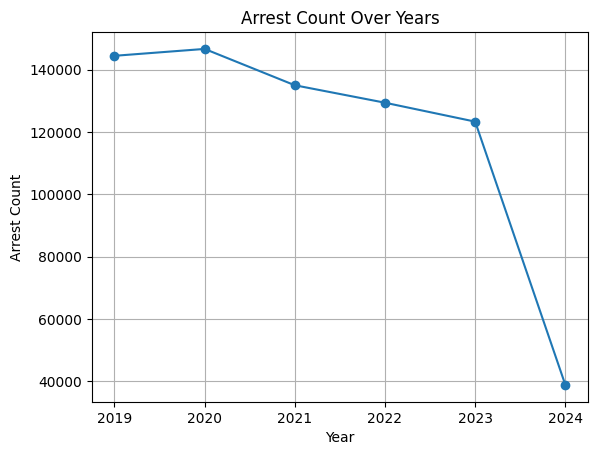

In [47]:
# Group data by arrest year and calculate the sum of arrest counts
arrests_per_year = df.groupby('Arrest Year')['Arrest Count'].sum()

# Plot the data
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-')

# Customize the plot
plt.title('Arrest Count Over Years')
plt.xlabel('Year')
plt.ylabel('Arrest Count')
plt.grid(True)

# Show the plot
plt.show()